In [76]:
# pip install seaborn
# !pip install xgboost
# !pip install scikit-learn

In [93]:
import pandas as pd
import numpy as np
import os
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import xgboost as xgb


In [78]:
# emission_data.index <- checks the index of the dataframe
# pd.to_date(emisson_data.index) <- change the index format to date or date and time


In [112]:
emission_data_train = pd.read_csv('C:\\Users\\harve\\Downloads\\train.csv', low_memory=False)

In [4]:
emission_data_test = pd.read_csv('C:\\Users\\harve\\Downloads\\test.csv', low_memory=False)

In [5]:
emission_data_train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [6]:
emission_data_train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [82]:
emission_data_datatypes = {}

column = 0
for column in emission_data.columns:
    emission_data_datatypes[column] = emission_data[column].dtypes

In [113]:
drop_cols = [57,58,59,60,61,62,63]

emission_data_train_clean = emission_data_train.drop(emission_data_train.columns[drop_cols], axis=1)

# emission_data_test_clean = emission_data_test.drop(emission_data_test.columns[drop_cols], axis=1)

In [34]:
emission_data_train_clean.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [116]:

# #Create a new column 'date' by combining 'year' and 'week_number'
# emission_data_train_clean['date'] = emission_data_train_clean.apply(lambda row: pd.to_datetime(f'{row["year"]}-W{int(row["week_no"])}-1', format='%G-W%V-%u'), axis=1)
# emission_data_test_clean['date'] = emission_data_test_clean.apply(lambda row: pd.to_datetime(f'{row["year"]}-W{int(row["week_no"])}-1', format='%G-W%V-%u'), axis=1)
# # Extract day and month into new columns
# emission_data_test_clean['day'] = emission_data_test_clean['date'].dt.day
# emission_data_test_clean['month'] = emission_data_test_clean['date'].dt.month
# emission_data_test_clean['quarter'] = emission_data_test_clean['date'].dt.quarter

# emission_data_train_clean['day'] = emission_data_train_clean['date'].dt.day
# emission_data_train_clean['month'] = emission_data_train_clean['date'].dt.month
# emission_data_train_clean['quarter'] = emission_data_train_clean['date'].dt.quarter


# # Drop first three columns
# drop_columns = [0,1,2]
# emission_data_train_clean = emission_data_train_clean.drop(emission_data_train_clean.columns[drop_columns], axis = 1)

# emission_data_test_clean = emission_data_test_clean.drop(emission_data_test_clean.columns[drop_columns], axis = 1)

# emission_data_train_clean.head()

def create_date_features(df, year_col, week_col):
    # Convert year and week to datetime
    df['date'] = pd.to_datetime(df[year_col].astype(str) + df[week_col].astype(str) + '0', format='%Y%U%w')
    
    # Extract day (as words and number)
    df['day_number'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    
    # Extract month (as words and number)
    df['month_number'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.month_name()
    
    # Extract quarter
    df['quarter'] = df['date'].dt.quarter
    
    return df

emission_data_train_clean = create_date_features(emission_data_train_clean, 'year', 'week_no')

In [117]:
emission_data_train_clean.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date,day_number,day_name,month_number,month_name,quarter
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,35.632416,-138.786423,30.752140,3.750994,2019-01-01,1,Tuesday,1,January,1
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,39.557633,-145.183930,27.251779,4.025176,2019-01-06,6,Sunday,1,January,1
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,30.401823,-142.519545,26.193296,4.231381,2019-01-13,13,Sunday,1,January,1
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,24.380357,-132.665828,28.829155,4.305286,2019-01-20,20,Sunday,1,January,1
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,37.392979,-141.509805,22.204612,4.347317,2019-01-27,27,Sunday,1,January,1


In [118]:
drop_columns = [0,1,2]
emission_data_train_clean = emission_data_train_clean.drop(emission_data_train_clean.columns[drop_columns], axis = 1)
emission_data_train_clean.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date,day_number,day_name,month_number,month_name,quarter
0,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,...,35.632416,-138.786423,30.752140,3.750994,2019-01-01,1,Tuesday,1,January,1
1,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,...,39.557633,-145.183930,27.251779,4.025176,2019-01-06,6,Sunday,1,January,1
2,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,...,30.401823,-142.519545,26.193296,4.231381,2019-01-13,13,Sunday,1,January,1
3,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.380357,-132.665828,28.829155,4.305286,2019-01-20,20,Sunday,1,January,1
4,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,...,37.392979,-141.509805,22.204612,4.347317,2019-01-27,27,Sunday,1,January,1


In [119]:
def impute_missing_with_mean(df):
    """
    Impute missing values in each column with the mean of that column.

    Parameters:
    - df: pandas DataFrame

    
    Returns:
    - None (imputes missing values in place)
    """
    for column in df.columns:
        if df[column].isnull().any():  
            mean_value = df[column].mean()  
            df[column].fillna(mean_value, inplace=True)
    return df

 


In [139]:
train = impute_missing_with_mean(emission_data_train_clean)
train.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_solar_zenith_angle,emission,date,day_number,day_name,month_number,month_name,quarter,Day_name,Month_name
0,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,...,30.752140,3.750994,2019-01-01,1,Tuesday,1,January,1,Tuesday,January
1,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,...,27.251779,4.025176,2019-01-06,6,Sunday,1,January,1,Sunday,January
2,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,...,26.193296,4.231381,2019-01-13,13,Sunday,1,January,1,Sunday,January
3,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,28.829155,4.305286,2019-01-20,20,Sunday,1,January,1,Sunday,January
4,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,...,22.204612,4.347317,2019-01-27,27,Sunday,1,January,1,Sunday,January


In [ ]:
# Add location features


In [ ]:
# Use PCA reduce the dimension of the dataset

In [ ]:
# Select important features

In [55]:
# test = impute_missing_with_mean(emission_data_test_clean)


In [140]:
# Check for missing values in each column
missing_values = train.isnull().any()

if missing_values.any():
    print("Missing value present.")
else:
    print("No missing value.")

No missing value.


In [141]:
# Check for duplicate week number
week_unique = not train['week_no'].duplicated().any()

if week_unique:
    print("All week numbers are unique.")
else:
    print("There are duplicate week numbers.")

There are duplicate week numbers.


In [123]:
# Extract additional date-related columns
# Convert 'Order_date' to datetime type
# train['date'] = pd.to_datetime(train['date'], format='%d-%m-%Y')
# # test['date'] = pd.to_datetime(test['date'], format='%d-%m-%Y')

# # Extract additional date-related columns
# train['Day_name'] = train['date'].dt.strftime('%A')  # Day names
# train['Month_name'] = train['date'].dt.strftime('%B')  # Month names

# test['Day_name'] = test['date'].dt.strftime('%A')  # Day names
# test['Month_name'] = test['date'].dt.strftime('%B')  # Month names

# # Set the order of months
month_order = list(calendar.month_name)[1:]

In [142]:
train = train.set_index('date')

# test = test.set_index('date')

train = train.sort_values('date')

# test = test.sort_values('date')



In [166]:
train.head(70)

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,day_number,day_name,month_number,month_name,quarter,Day_name,Month_name
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,...,-138.786423,30.752140,3.750994,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,-136.769099,30.376172,96.239970,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,-0.000026,0.836491,-0.000031,0.099700,-12.847089,19.495761,-136.041470,28.939565,...,-137.388901,29.091495,3.603776,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,-138.802930,30.632483,0.811653,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000123,0.882393,0.000111,0.079656,-10.935055,42.497461,-132.495373,33.101882,...,-131.363725,32.853709,0.809576,1,Tuesday,1,January,1,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,2019,0,0.000460,0.839742,0.000386,0.079169,71.807579,63.553410,-155.140076,23.799763,...,-139.811646,29.843172,126.543480,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000042,0.764940,0.000029,0.154027,-42.128680,43.247947,-135.172425,30.376802,...,-135.169991,30.378359,31.322866,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000048,0.777410,0.000024,0.230987,-11.113091,32.724444,-134.823418,32.390105,...,-138.336411,30.738505,3.146559,1,Tuesday,1,January,1,Tuesday,January


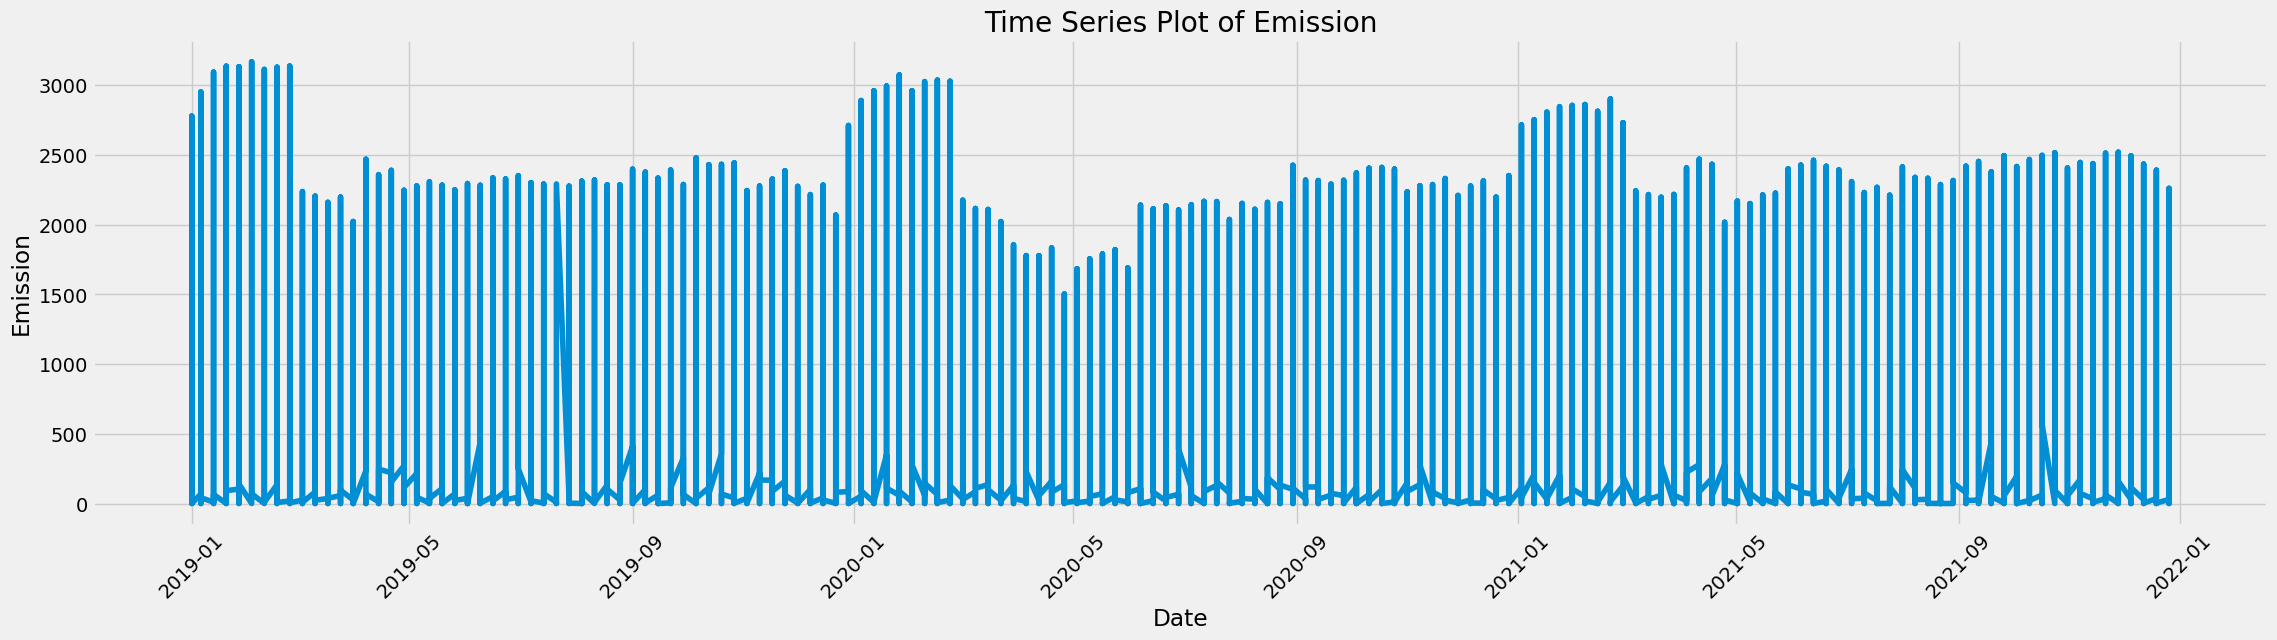

In [144]:
plt.figure(figsize=(25, 6))
plt.plot(train.index, train['emission'], linestyle='-')
plt.title('Time Series Plot of Emission')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.xticks(rotation=45) 
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3933093421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_name', y='emission', data=train, errorbar=None, palette=custom_palette)
C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3933093421.py:3: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Month_name', y='emission', data=train, errorbar=None, palette=custom_palette)


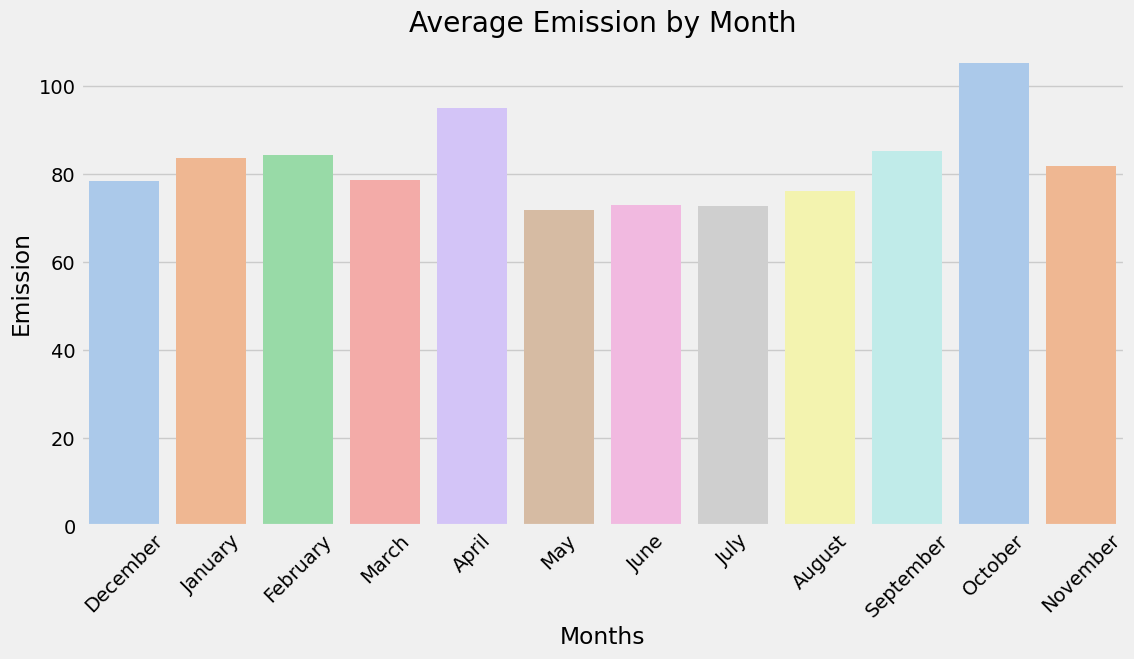

In [65]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(x='Month_name', y='emission', data=train, errorbar=None, palette=custom_palette)
plt.title('Average Emission by Month')
plt.xticks(rotation=45)
plt.ylabel('Emission')
plt.xlabel('Months')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3421383710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='emission', data=train, errorbar=None, palette=custom_palette)
C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3421383710.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x='day_name', y='emission', data=train, errorbar=None, palette=custom_palette)


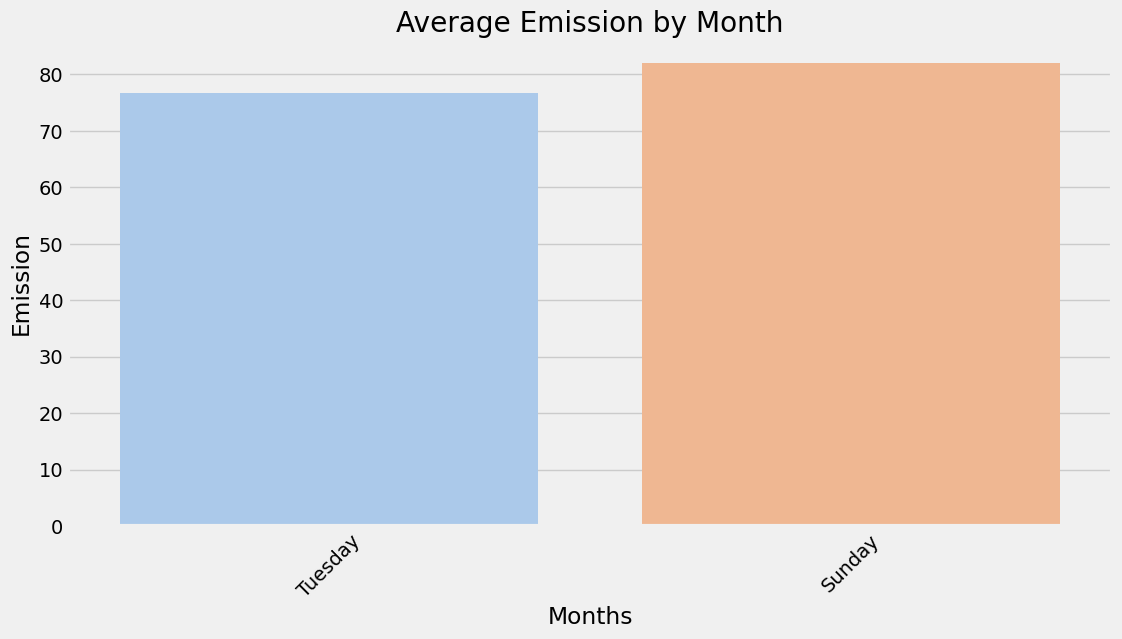

In [167]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='emission', data=train, errorbar=None, palette=custom_palette)
plt.title('Average Emission by Month')
plt.xticks(rotation=45)
plt.ylabel('Emission')
plt.xlabel('Months')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3886043577.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='week_no', y='emission', data=train, palette=custom_palette)


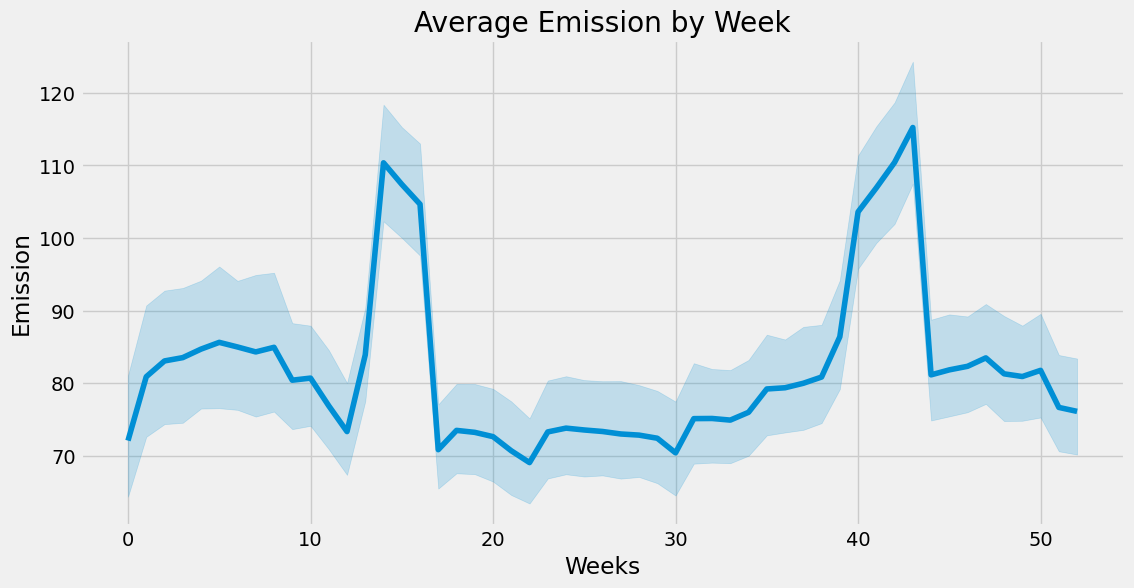

In [163]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_no', y='emission', data=train, palette=custom_palette)
plt.title('Average Emission by Week')
plt.ylabel('Emission')
plt.xlabel('Weeks')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3776800780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='emission', data=train, errorbar=None, palette=custom_palette)
C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3776800780.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x='quarter', y='emission', data=train, errorbar=None, palette=custom_palette)


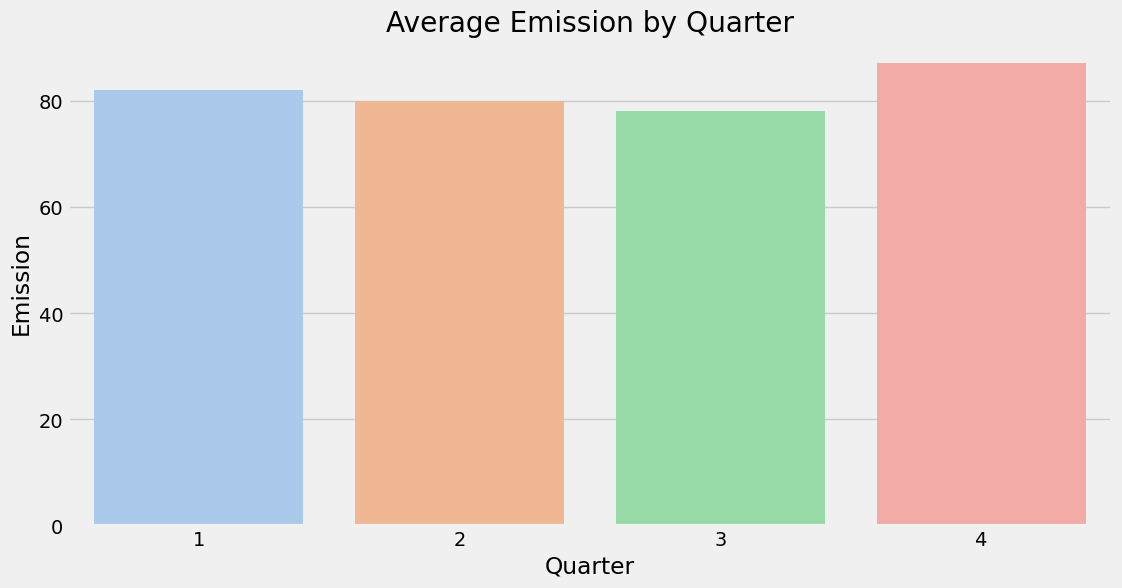

In [68]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(x='quarter', y='emission', data=train, errorbar=None, palette=custom_palette)
plt.title('Average Emission by Quarter')
# plt.xticks(rotation=45)
plt.ylabel('Emission')
plt.xlabel('Quarter')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_14828\2423124002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='emission', data=train, errorbar=None, palette=custom_palette)
C:\Users\harve\AppData\Local\Temp\ipykernel_14828\2423124002.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x='year', y='emission', data=train, errorbar=None, palette=custom_palette)


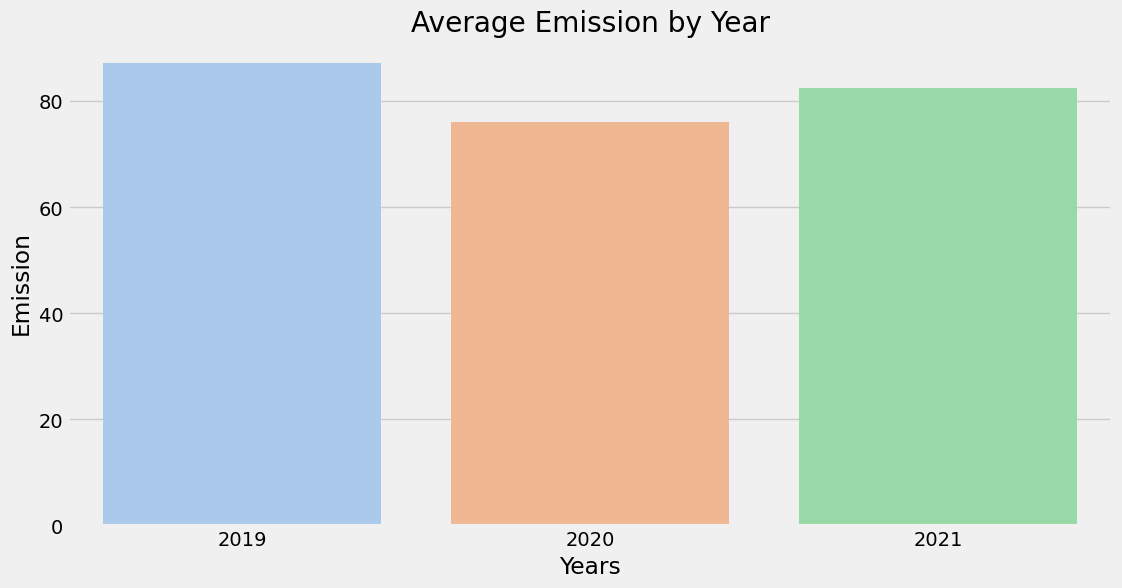

In [70]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='emission', data=train, errorbar=None, palette=custom_palette)
plt.title('Average Emission by Year')
plt.ylabel('Emission')
plt.xlabel('Years')
plt.show()

Train/Test Split

We don't need to split the dataset since we already have a test dataset.

In [149]:
train.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,day_number,day_name,month_number,month_name,quarter,Day_name,Month_name
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,...,-138.786423,30.752140,3.750994,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,-136.769099,30.376172,96.239970,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,-0.000026,0.836491,-0.000031,0.099700,-12.847089,19.495761,-136.041470,28.939565,...,-137.388901,29.091495,3.603776,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,-138.802930,30.632483,0.811653,1,Tuesday,1,January,1,Tuesday,January
2019-01-01,2019,0,0.000123,0.882393,0.000111,0.079656,-10.935055,42.497461,-132.495373,33.101882,...,-131.363725,32.853709,0.809576,1,Tuesday,1,January,1,Tuesday,January


In [151]:
train_fit = train.loc[train.index < '2020-12-31']
test_fit = train.loc[train.index >= '2021-01-01']

In [168]:
FEATURES = ['day_number', 'week_no','month_number', 'year', 'quarter']
TARGET = 'emission'

In [169]:
X_train = train_fit[FEATURES]
y_train = train_fit[TARGET]

X_test = test_fit[FEATURES]
y_test = test_fit[TARGET]

In [170]:
# Model building
# XGBoost Regressor

reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:143.20490	validation_1-rmse:146.52351
[100]	validation_0-rmse:143.08723	validation_1-rmse:146.49110
[200]	validation_0-rmse:142.99089	validation_1-rmse:146.46501
[300]	validation_0-rmse:142.91214	validation_1-rmse:146.43328
[400]	validation_0-rmse:142.84757	validation_1-rmse:146.41187
[500]	validation_0-rmse:142.79460	validation_1-rmse:146.39849
[600]	validation_0-rmse:142.75113	validation_1-rmse:146.39111
[700]	validation_0-rmse:142.71544	validation_1-rmse:146.38841
[770]	validation_0-rmse:142.69433	validation_1-rmse:146.38872


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:
# Feature importance
feat_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

feat_importance

,importance
day_number,0.009009
week_no,0.137622
month_number,0.195224
year,0.658146
quarter,0.000000


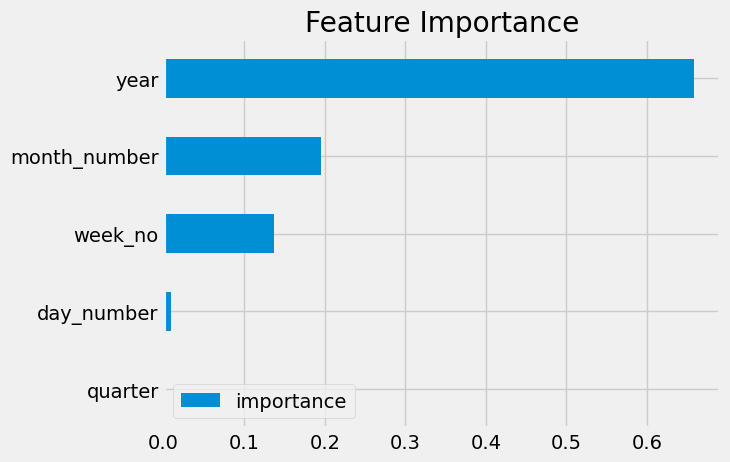

In [172]:
# Visualize on a bar plot

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [159]:
# Forecast on the test dataset

test_fit['prediction'] = reg.predict(X_test)


C:\Users\harve\AppData\Local\Temp\ipykernel_14828\3776411778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_fit['prediction'] = reg.predict(X_test)


In [160]:
# Merge predictions

train_pred =train.merge(test_fit[['prediction']], how='left', left_index=True, right_index=True)

train_pred 

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_solar_zenith_angle,emission,day_number,day_name,month_number,month_name,quarter,Day_name,Month_name,prediction
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,...,30.752140,3.750994,1,Tuesday,1,January,1,Tuesday,January,NaN
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,30.376172,96.239970,1,Tuesday,1,January,1,Tuesday,January,NaN
2019-01-01,2019,0,-0.000026,0.836491,-0.000031,0.099700,-12.847089,19.495761,-136.041470,28.939565,...,29.091495,3.603776,1,Tuesday,1,January,1,Tuesday,January,NaN
2019-01-01,2019,0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,...,30.632483,0.811653,1,Tuesday,1,January,1,Tuesday,January,NaN
2019-01-01,2019,0,0.000123,0.882393,0.000111,0.079656,-10.935055,42.497461,-132.495373,33.101882,...,32.853709,0.809576,1,Tuesday,1,January,1,Tuesday,January,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,8.273742,-135.766205,29.160498,...,30.246387,27.239302,26,Sunday,12,December,4,Sunday,December,74.265602
2021-12-26,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,8.273742,-135.766205,29.160498,...,30.246387,27.239302,26,Sunday,12,December,4,Sunday,December,74.265602
2021-12-26,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,8.273742,-135.766205,29.160498,...,30.246387,27.239302,26,Sunday,12,December,4,Sunday,December,74.265602


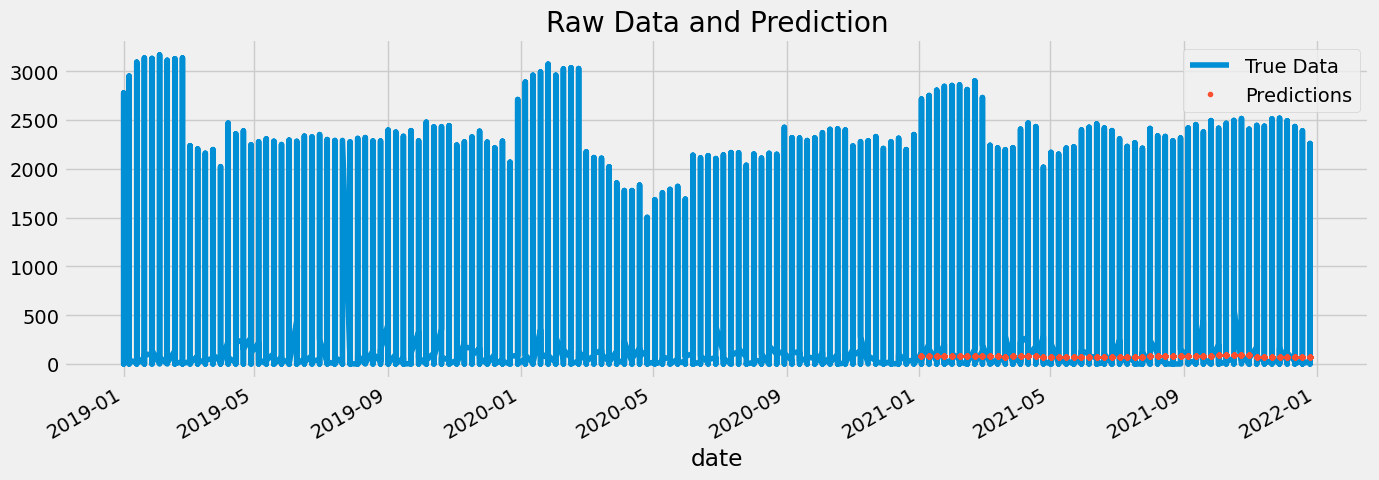

In [161]:
ax = train_pred[['emission']].plot(figsize=(15,5))
train_pred['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
# Evaluation metric using RMSE

score = np.sqrt(mean_squared_error(emission_test_data['emission'], emission_test_data['prediction']))

print(f'RMSE Score on test set: {score:0.2f}')

# Calculate R-squared
r2 = r2_score(test['Time(hrs)'], test['prediction'])

print(f'R-squared: {r2:.2f}')